# Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Reading the dataset

In [2]:
df = pd.read_csv('canteen_shop_data.csv')
print(df.shape)
df.head(10)

(200, 12)


,Date,Time,Item,Price,Quantity,Total,Customer ID,Payment Method,Employee ID,Customer Satisfaction,Weather,Special Offers
0,2024-04-01,12:15,Sandwich,4.5,2,9.0,1,Cash,101,4,Sunny,Yes
1,2024-04-01,12:30,Drink,1.5,1,1.5,2,Card,102,3,Sunny,No
2,2024-04-01,12:45,Salad,5.0,1,5.0,3,Mobile Payment,103,5,Cloudy,Yes
3,2024-04-01,13:00,Burger,5.5,1,5.5,4,Cash,104,4,Sunny,No
4,2024-04-01,13:15,Sandwich,4.5,1,4.5,5,Card,105,3,Sunny,Yes
5,2024-04-01,13:30,Drink,1.5,2,3.0,6,Mobile Payment,106,5,Cloudy,No
6,2024-04-01,13:45,Salad,5.0,1,5.0,7,Cash,107,4,Rainy,Yes
7,2024-04-01,14:00,Burger,5.5,2,11.0,8,Card,108,3,Sunny,No
8,2024-04-02,12:00,Sandwich,4.5,1,4.5,9,Mobile Payment,109,5,Rainy,Yes
9,2024-04-02,12:15,Drink,1.5,1,1.5,10,Cash,110,4,Sunny,No


#Data Exploration

##Missing value checking

<Axes: >

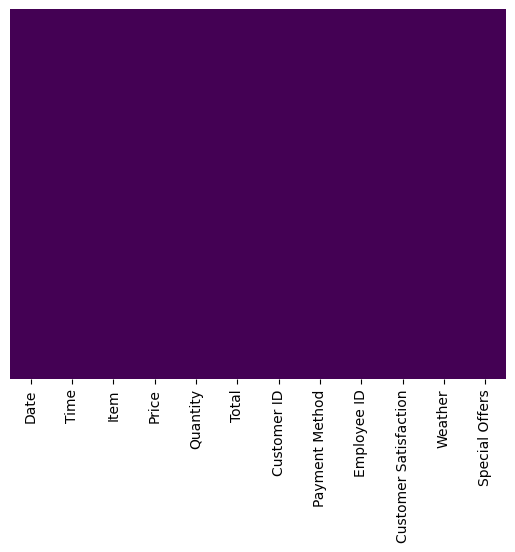

In [3]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Overall exploring

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   200 non-null    object 
 1   Time                   200 non-null    object 
 2   Item                   200 non-null    object 
 3   Price                  200 non-null    float64
 4   Quantity               200 non-null    int64  
 5   Total                  200 non-null    float64
 6   Customer ID            200 non-null    int64  
 7   Payment Method         200 non-null    object 
 8   Employee ID            200 non-null    int64  
 9   Customer Satisfaction  200 non-null    int64  
 10  Weather                200 non-null    object 
 11  Special Offers         200 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 18.9+ KB
None


In [5]:
#statistic summary
df.describe(include = 'all')

,Date,Time,Item,Price,Quantity,Total,Customer ID,Payment Method,Employee ID,Customer Satisfaction,Weather,Special Offers
count,200,200,200,200.000000,200.000000,200.000000,200.000000,200,200.000000,200.000000,200,200
unique,25,9,4,NaN,NaN,NaN,NaN,3,NaN,NaN,3,2
top,2024-04-01,12:15,Sandwich,NaN,NaN,NaN,NaN,Mobile Payment,NaN,NaN,Sunny,Yes
freq,8,25,50,NaN,NaN,NaN,NaN,71,NaN,NaN,77,100
mean,NaN,NaN,NaN,4.125000,1.365000,5.910000,100.500000,NaN,200.500000,3.895000,NaN,NaN
std,NaN,NaN,NaN,1.560143,0.482638,3.359813,57.879185,NaN,57.879185,0.785532,NaN,NaN
min,NaN,NaN,NaN,1.500000,1.000000,1.500000,1.000000,NaN,101.000000,3.000000,NaN,NaN
25%,NaN,NaN,NaN,3.750000,1.000000,4.125000,50.750000,NaN,150.750000,3.000000,NaN,NaN
50%,NaN,NaN,NaN,4.750000,1.000000,5.000000,100.500000,NaN,200.500000,4.000000,NaN,NaN
75%,NaN,NaN,NaN,5.125000,2.000000,9.000000,150.250000,NaN,250.250000,5.000000,NaN,NaN


In [6]:
df.nunique()

,0
Date,25
Time,9
Item,4
Price,4
Quantity,2
Total,8
Customer ID,200
Payment Method,3
Employee ID,200
Customer Satisfaction,3


In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_cols = [col for col in df.select_dtypes(include=['object']).columns]
all_cols = df.columns.to_list()

print(f'{len(num_cols)} Numerical columns: {num_cols}')
print(f'{len(cat_cols)} Categorical columns: {cat_cols}')
print(f'{len(all_cols)} columns: {all_cols}')

6 Numerical columns: ['Price', 'Quantity', 'Total', 'Customer ID', 'Employee ID', 'Customer Satisfaction']
6 Categorical columns: ['Date', 'Time', 'Item', 'Payment Method', 'Weather', 'Special Offers']
12 columns: ['Date', 'Time', 'Item', 'Price', 'Quantity', 'Total', 'Customer ID', 'Payment Method', 'Employee ID', 'Customer Satisfaction', 'Weather', 'Special Offers']


##Numerical exploring

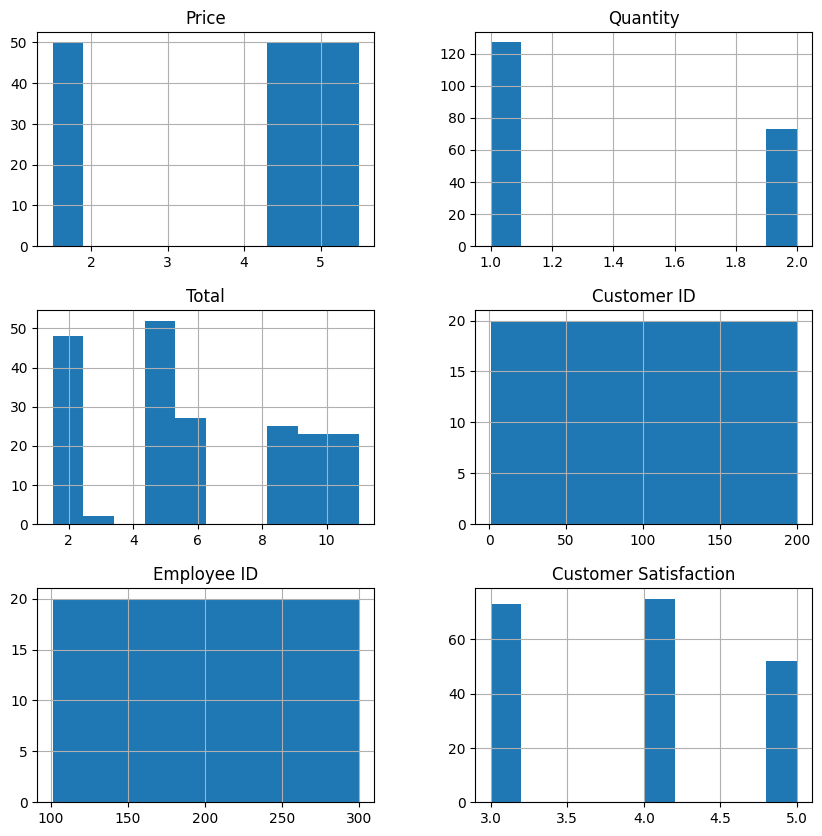

In [8]:
#Histogram of numerical
df.hist(figsize=(10, 10))
plt.show()

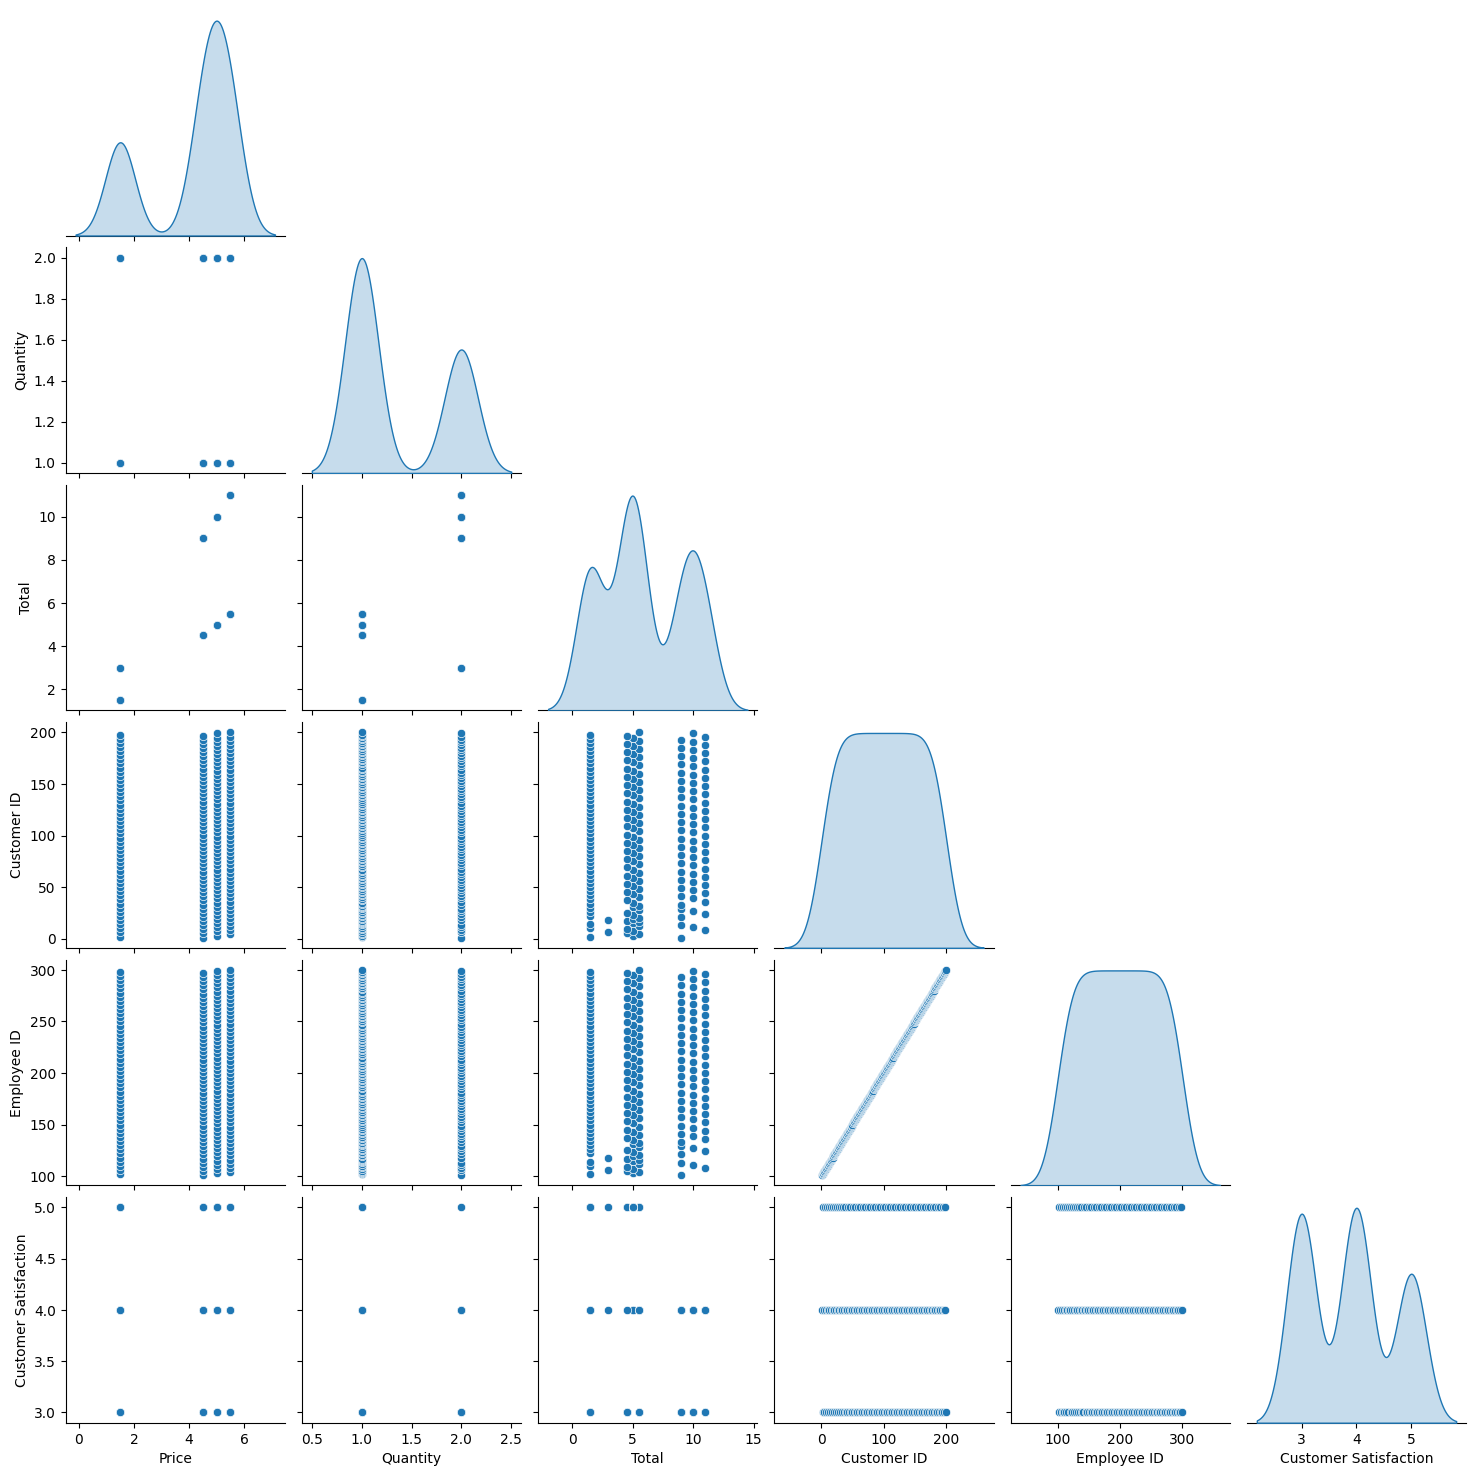

In [9]:
#pairplot
sns.pairplot(df, diag_kind="kde", corner=True)

Correlation Matrix: 
                           Price  Quantity     Total  Customer ID  Employee ID  \
Price                  1.000000  0.372888  0.760462     0.009043     0.009043   
Quantity               0.372888  1.000000  0.875661     0.023296     0.023296   
Total                  0.760462  0.875661  1.000000     0.039937     0.039937   
Customer ID            0.009043  0.023296  0.039937     1.000000     1.000000   
Employee ID            0.009043  0.023296  0.039937     1.000000     1.000000   
Customer Satisfaction -0.085594 -0.004440 -0.051199    -0.038960    -0.038960   

                       Customer Satisfaction  
Price                              -0.085594  
Quantity                           -0.004440  
Total                              -0.051199  
Customer ID                        -0.038960  
Employee ID                        -0.038960  
Customer Satisfaction               1.000000   



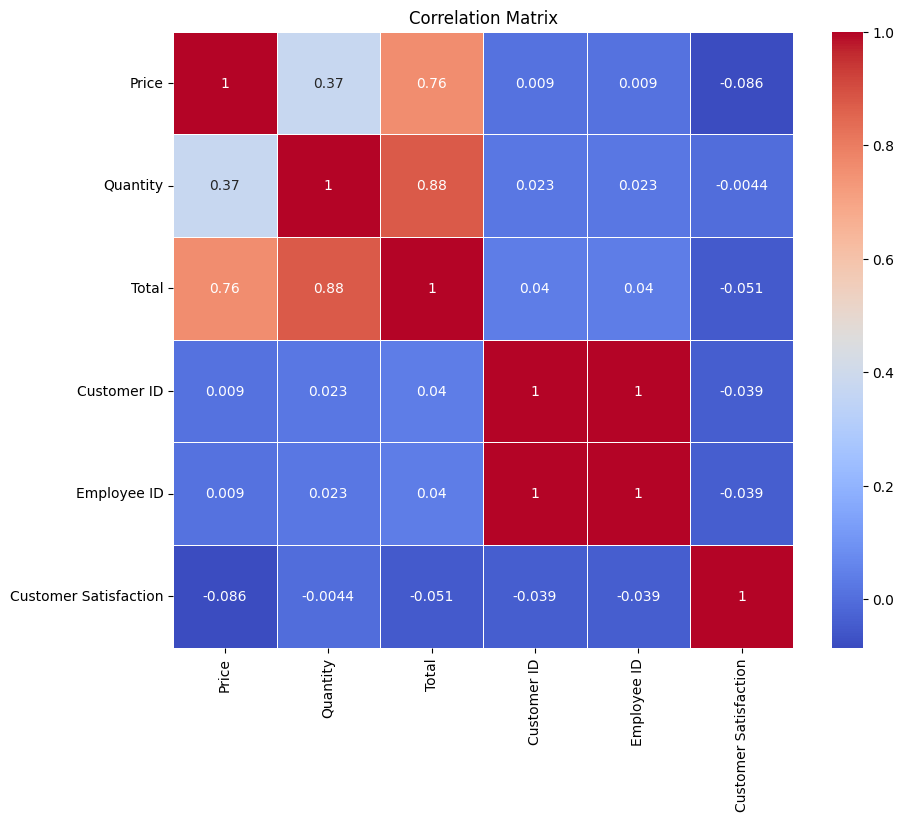

In [10]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Print the correlation matrix
print("Correlation Matrix: \n", correlation_matrix, '\n')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

##Categorical exploring

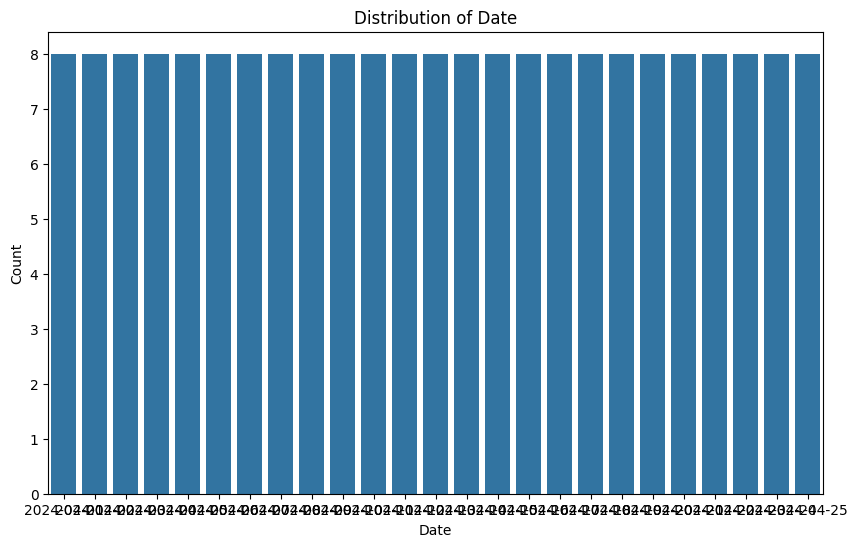

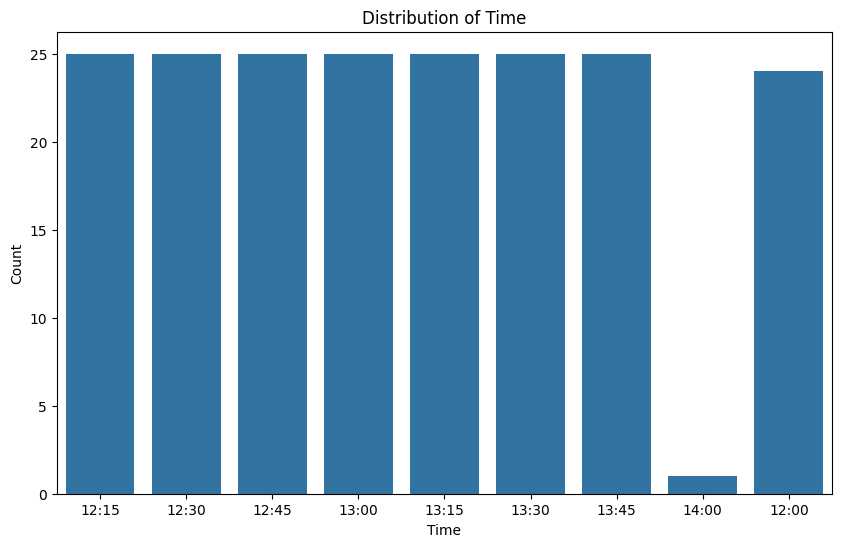

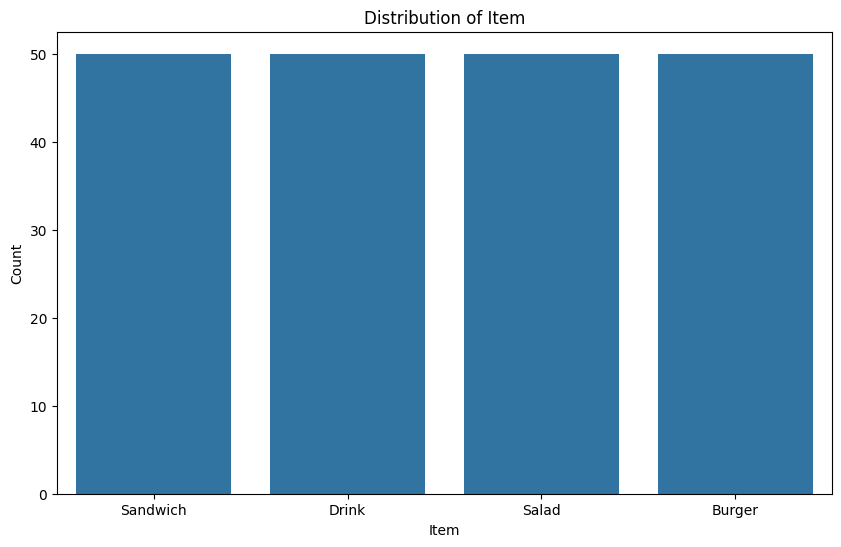

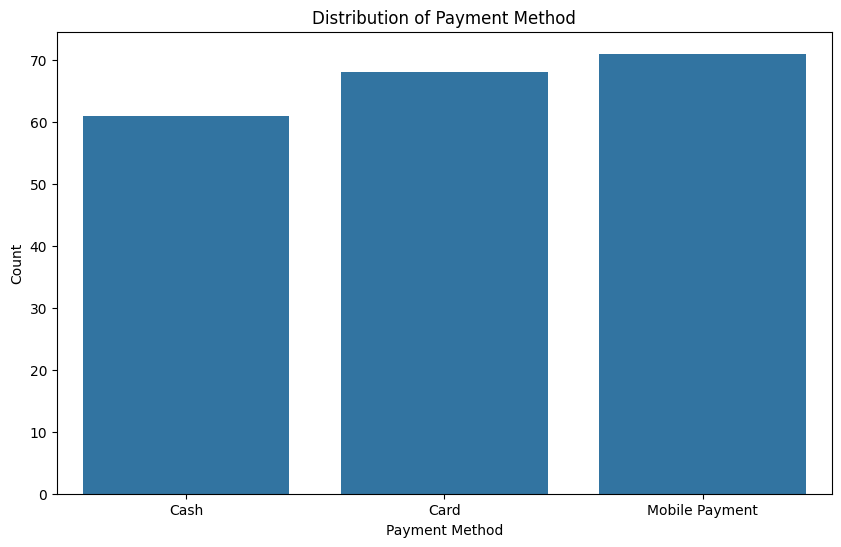

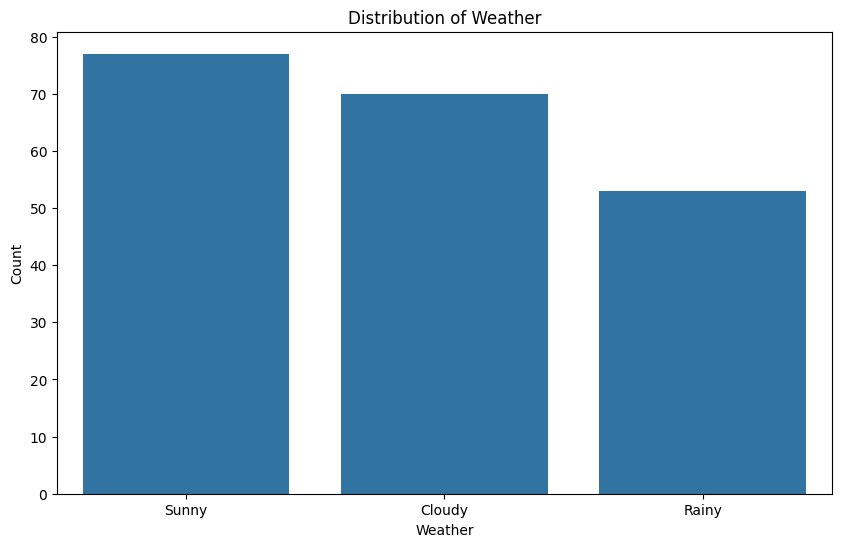

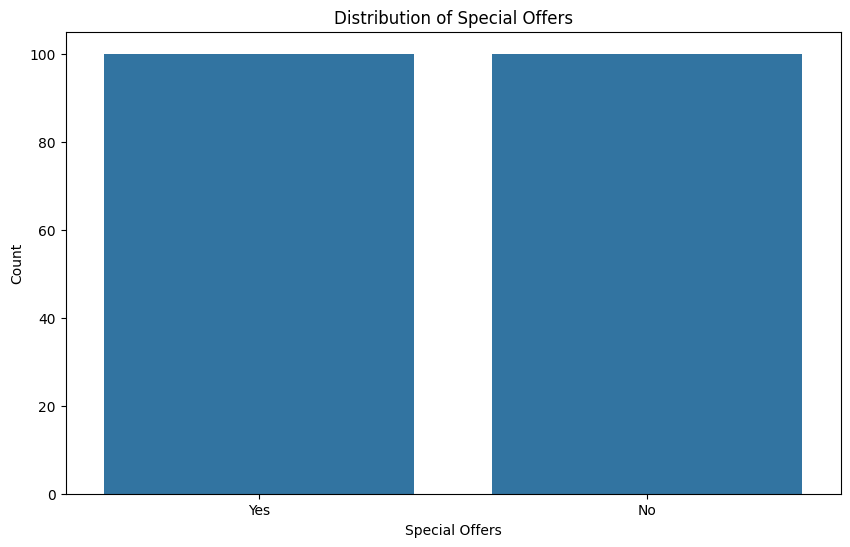

In [11]:
#Bar chart of categorical
for col in cat_cols:
    if col == 'customerID':
        continue  # Skip the 'ID' column

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#1st Analysis

In [12]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset
data = df

# Combine 'Item' and 'Weather' into a single list for each transaction
data['Combined'] = data.apply(lambda row: [row['Item'], row['Weather']], axis=1)

# Create a one-hot encoded dataframe
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
transactions = te.fit(data['Combined']).transform(data['Combined'])
transactions_df = pd.DataFrame(transactions, columns=te.columns_)

# Apply Apriori Algorithm to find frequent itemsets
frequent_itemsets = apriori(transactions_df, min_support=0.01, use_colnames=True)

# Generate Association Rules with the required num_itemsets argument
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0,
                          num_itemsets=len(frequent_itemsets))

# Filter rules where 'Weather' appears in antecedents or consequents
weather_rules = rules[
    rules['antecedents'].apply(lambda x: any(weather in x for weather in ['Sunny', 'Rainy', 'Cloudy'])) |
    rules['consequents'].apply(lambda x: any(weather in x for weather in ['Sunny', 'Rainy', 'Cloudy']))
]

# Display the filtered rules
print(weather_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


   antecedents consequents  support  confidence      lift
0     (Cloudy)    (Burger)    0.100    0.285714  1.142857
1     (Burger)    (Cloudy)    0.100    0.400000  1.142857
2      (Sunny)    (Burger)    0.125    0.324675  1.298701
3     (Burger)     (Sunny)    0.125    0.500000  1.298701
4     (Cloudy)  (Sandwich)    0.115    0.328571  1.314286
5   (Sandwich)    (Cloudy)    0.115    0.460000  1.314286
6      (Drink)     (Rainy)    0.165    0.660000  2.490566
7      (Rainy)     (Drink)    0.165    0.622642  2.490566
8      (Sunny)     (Salad)    0.115    0.298701  1.194805
9      (Salad)     (Sunny)    0.115    0.460000  1.194805
10     (Sunny)  (Sandwich)    0.120    0.311688  1.246753
11  (Sandwich)     (Sunny)    0.120    0.480000  1.246753


In [13]:
# Sort the filtered rules by 'lift' in descending order
sorted_weather_rules = weather_rules.sort_values(by='lift', ascending=False)

# Display the sorted rules
print(sorted_weather_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

   antecedents consequents  support  confidence      lift
6      (Drink)     (Rainy)    0.165    0.660000  2.490566
7      (Rainy)     (Drink)    0.165    0.622642  2.490566
4     (Cloudy)  (Sandwich)    0.115    0.328571  1.314286
5   (Sandwich)    (Cloudy)    0.115    0.460000  1.314286
2      (Sunny)    (Burger)    0.125    0.324675  1.298701
3     (Burger)     (Sunny)    0.125    0.500000  1.298701
10     (Sunny)  (Sandwich)    0.120    0.311688  1.246753
11  (Sandwich)     (Sunny)    0.120    0.480000  1.246753
8      (Sunny)     (Salad)    0.115    0.298701  1.194805
9      (Salad)     (Sunny)    0.115    0.460000  1.194805
0     (Cloudy)    (Burger)    0.100    0.285714  1.142857
1     (Burger)    (Cloudy)    0.100    0.400000  1.142857


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#2nd Analysis

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
data = df

# Preprocessing: Drop unnecessary columns for the prediction task
X = data.drop(['Customer Satisfaction', 'Date', 'Time', 'Customer ID', 'Employee ID'], axis=1)
y = data['Customer Satisfaction']

# Encode categorical variables
categorical_features = ['Item', 'Payment Method', 'Weather', 'Special Offers']
numerical_features = ['Price', 'Quantity', 'Total']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)

# Display results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance (for Random Forest)
rf_model = pipeline.named_steps['classifier']
importances = rf_model.feature_importances_
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist() + numerical_features

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confusion Matrix:
 [[18  2  2]
 [ 6 15  1]
 [ 1  0 15]]

Classification Report:
               precision    recall  f1-score   support

           3       0.72      0.82      0.77        22
           4       0.88      0.68      0.77        22
           5       0.83      0.94      0.88        16

    accuracy                           0.80        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.81      0.80      0.80        60


Feature Importance:
                           Feature  Importance
2                      Item_Salad    0.166400
1                      Item_Drink    0.136750
12                          Price    0.108502
10              Special Offers_No    0.099971
9                   Weather_Sunny    0.070769
11             Special Offers_Yes    0.060784
8                   Weather_Rainy    0.057237
5             Payment Method_Cash    0.055884
0                     Item_Burger    0.055246
14                          Total    0.039869
4         

#3rd Analysis

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
data = df

# Preview the dataset
print(data.head())

# Feature engineering: Drop unnecessary columns and set target variable
X = data.drop(['Date', 'Time', 'Total', 'Employee ID', 'Customer ID'], axis=1)  # Features
y = data['Total']  # Target: Total sales amount

# Encode categorical variables
categorical_features = ['Item', 'Payment Method', 'Weather', 'Special Offers']
numerical_features = ['Price', 'Quantity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

# Feature Importance (if needed)
rf_model = pipeline.named_steps['regressor']
importances = rf_model.feature_importances_
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist() + numerical_features

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


         Date   Time      Item  Price  Quantity  Total  Customer ID  \
0  2024-04-01  12:15  Sandwich    4.5         2    9.0            1   
1  2024-04-01  12:30     Drink    1.5         1    1.5            2   
2  2024-04-01  12:45     Salad    5.0         1    5.0            3   
3  2024-04-01  13:00    Burger    5.5         1    5.5            4   
4  2024-04-01  13:15  Sandwich    4.5         1    4.5            5   

   Payment Method  Employee ID  Customer Satisfaction Weather Special Offers  \
0            Cash          101                      4   Sunny            Yes   
1            Card          102                      3   Sunny             No   
2  Mobile Payment          103                      5  Cloudy            Yes   
3            Cash          104                      4   Sunny             No   
4            Card          105                      3   Sunny            Yes   

            Combined  
0  [Sandwich, Sunny]  
1     [Drink, Sunny]  
2    [Salad, Cloudy]  
